# Travelling Salesman Problem (TSP)

In [1]:
from pulp import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
cities = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8',
          'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15']

# intercity distances
inter = pd.read_fwf('p01_d.txt', header=None, names = cities) # fwf stands for fixed width formatted lines
inter.index = cities

inter

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
c1,0,29,82,46,68,52,72,42,51,55,29,74,23,72,46
c2,29,0,55,46,42,43,43,23,23,31,41,51,11,52,21
c3,82,55,0,68,46,55,23,43,41,29,79,21,64,31,51
c4,46,46,68,0,82,15,72,31,62,42,21,51,51,43,64
c5,68,42,46,82,0,74,23,52,21,46,82,58,46,65,23
c6,52,43,55,15,74,0,61,23,55,31,33,37,51,29,59
c7,72,43,23,72,23,61,0,42,23,31,77,37,51,46,33
c8,42,23,43,31,52,23,42,0,33,15,37,33,33,31,37
c9,51,23,41,62,21,55,23,33,0,29,62,46,29,51,11
c10,55,31,29,42,46,31,31,15,29,0,51,21,41,23,37


In [3]:
# Load positional data
position = pd.read_fwf('p01_xy.txt', header=None, names = ['x', 'y'])

In [4]:
position.index = cities
position

,x,y
c1,-4.008938e-08,3.588081e-08
c2,-2.887329e+01,-8.724121e-07
c3,-7.929158e+01,2.140333e+01
c4,-1.465774e+01,4.338955e+01
c5,-6.474726e+01,-2.189817e+01
c6,-2.905847e+01,4.321673e+01
c7,-7.207853e+01,-1.815835e-01
c8,-3.603665e+01,2.161355e+01
c9,-5.048084e+01,-7.374472e+00
c10,-5.058590e+01,2.158820e+01


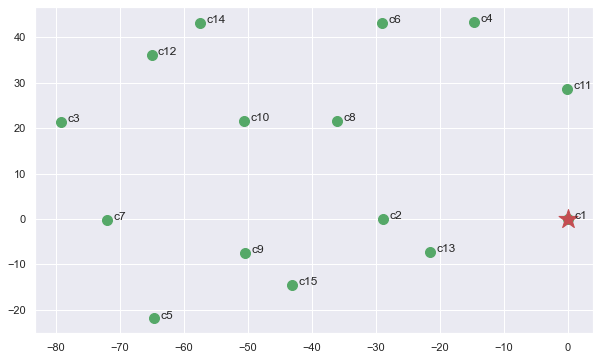

In [5]:
# Plot cities
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(position.x, position.y, c='g', s=100)

# Plot start city
plt.scatter(position.iloc[0].x, position.iloc[0].y, marker="*", c='r', s=400);

for txt in cities:
    ax.annotate(txt, (position.loc[txt].x + 1, position.loc[txt].y))

## TSP with PuLP Linear Programming

In [6]:
# Initialise the TSP model
TSP = LpProblem("TSP", sense=LpMinimize)


# Define Decision Variables
x = LpVariable.dicts('x', [(i, j) for i in cities for j in cities], cat='Binary')

# Auxiliary variables for subtours elimination
u = LpVariable.dicts('u', [i for i in cities], lowBound=1, upBound=len(cities), cat='Integer')


# Define Objective
TSP += lpSum([inter.loc[i, j] * x[(i, j)] for i in cities for j in cities])


# Define Constraints
for i in cities:
    # Sum of departure cities
    TSP += lpSum([x[(i, j)] for j in cities if i != j]) == 1
    # Sum of arrival cities
    TSP += lpSum([x[(j, i)] for j in cities if i != j]) == 1
    
# Eliminate Subtours
n =len(cities)
for i in cities:
    for j in cities:
        if i != j and (i != 'c1' and j!= 'c1'):
            TSP += u[i] - u[j] <= (n)*(1-x[(i,j)]) - 1


# Solve Model
TSP.solve()    

print(LpStatus[TSP.status])

Optimal


In [7]:
# Print the optimised solution
print("The minimised travel distance is", value(TSP.objective))

The minimised travel distance is 291.0


In [8]:
for i in cities:
    for j in cities:
        print("{} status {}".format((i,j), x[(i, j)].varValue))

('c1', 'c1') status None
('c1', 'c2') status 0.0
('c1', 'c3') status 0.0
('c1', 'c4') status 0.0
('c1', 'c5') status 0.0
('c1', 'c6') status 0.0
('c1', 'c7') status 0.0
('c1', 'c8') status 0.0
('c1', 'c9') status 0.0
('c1', 'c10') status 0.0
('c1', 'c11') status 0.0
('c1', 'c12') status 0.0
('c1', 'c13') status 1.0
('c1', 'c14') status 0.0
('c1', 'c15') status 0.0
('c2', 'c1') status 0.0
('c2', 'c2') status None
('c2', 'c3') status 0.0
('c2', 'c4') status 0.0
('c2', 'c5') status 0.0
('c2', 'c6') status 0.0
('c2', 'c7') status 0.0
('c2', 'c8') status 0.0
('c2', 'c9') status 0.0
('c2', 'c10') status 0.0
('c2', 'c11') status 0.0
('c2', 'c12') status 0.0
('c2', 'c13') status 0.0
('c2', 'c14') status 0.0
('c2', 'c15') status 1.0
('c3', 'c1') status 0.0
('c3', 'c2') status 0.0
('c3', 'c3') status None
('c3', 'c4') status 0.0
('c3', 'c5') status 0.0
('c3', 'c6') status 0.0
('c3', 'c7') status 0.0
('c3', 'c8') status 0.0
('c3', 'c9') status 0.0
('c3', 'c10') status 0.0
('c3', 'c11') status 0.0

In [9]:
edges = [(i,j) for (i,j) in x if value(x[(i, j)]) != 0 and value(x[(i, j)]) != None]
edges

[('c1', 'c13'),
 ('c2', 'c15'),
 ('c3', 'c12'),
 ('c4', 'c11'),
 ('c5', 'c7'),
 ('c6', 'c4'),
 ('c7', 'c3'),
 ('c8', 'c6'),
 ('c9', 'c5'),
 ('c10', 'c8'),
 ('c11', 'c1'),
 ('c12', 'c14'),
 ('c13', 'c2'),
 ('c14', 'c10'),
 ('c15', 'c9')]

In [10]:
# Define a function to get the sequence of the route
def get_route (start):
    route = [start]
    edge = edges.copy()
    found = True
    while found:
        found = False
        for (i, j) in edge:
            if i == route[-1]:
                route.append(j)
                edge.remove((i,j))
                found = True
                    
    return route   

In [11]:
route = get_route('c1')

In [12]:
print(' -> '.join([ r for r in route]))

c1 -> c13 -> c2 -> c15 -> c9 -> c5 -> c7 -> c3 -> c12 -> c14 -> c10 -> c8 -> c6 -> c4 -> c11 -> c1


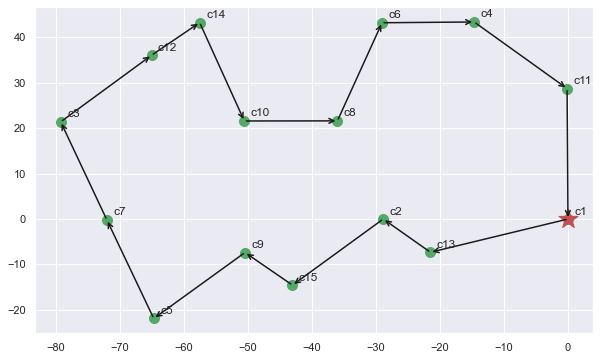

In [13]:
# Plot cities
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(position.x, position.y, c='g', s=100)

# Plot start city
plt.scatter(position.iloc[0].x, position.iloc[0].y, marker="*", c='r', s=400);

for txt in cities:
    ax.annotate(txt, (position.loc[txt].x + 1, position.loc[txt].y + 1))
    
    
# Plot the route
for (i, j) in edges:
    p1,p2 = position.loc[i], position.loc[j]
    ax.annotate("", p1, p2, arrowprops=dict(arrowstyle="<-", color='k', lw=1.5))

# Vehicle Routing Problem (VRP)

**The Pizza Store Delivery**
 
In the following exercise, we will try to solve a simplified vehicle routing problem for a pizza store at central Cambridge, United Kindgom. 

In [14]:
Cambridge = pd.read_excel('Cambridge.xlsx', index_col="College" )
Cambridge

,Latitude,Longitude,The Pizza Store,Wolfson College,Christ's College,Churchill College,Clare College,Clare Hall,Corpus Christi College,Darwin College,...,Peterhouse,Queens' College,Robinson College,Selwyn College,Sidney Sussex College,St Catharine's College,St Edmund's College,St John's College,Trinity College,Trinity Hall
College,,,,,,,,,,,,,,,,,,,,,
The Pizza Store,52.203982,0.118100,0.0000,1.2850,0.3906,1.6080,0.23540,0.9359,0.11630,0.4828,...,0.3709,0.3410,0.9429,0.9034,0.4285,0.14010,1.1650,0.5737,0.4758,0.28490
Wolfson College,52.199085,0.101017,1.2850,0.0000,1.6650,1.5660,1.17400,0.6183,1.22800,0.8741,...,1.1780,0.9637,0.6913,0.3925,1.6380,1.16900,1.6100,1.4300,1.2080,1.21700
Christ's College,52.206260,0.122464,0.3906,1.6650,0.0000,1.7200,0.51320,1.2530,0.48250,0.8702,...,0.6910,0.7316,1.2430,1.2770,0.1766,0.52640,1.1800,0.5869,0.6399,0.50250
Churchill College,52.213150,0.099859,1.6080,1.5660,1.7200,0.0000,1.37400,1.0360,1.67300,1.6770,...,1.8660,1.5910,0.9613,1.3890,1.5590,1.62900,0.6089,1.1340,1.1350,1.32400
Clare College,52.205106,0.115172,0.2354,1.1740,0.5132,1.3740,0.00000,0.7420,0.30390,0.5090,...,0.5350,0.3565,0.7373,0.7819,0.4638,0.27220,0.9563,0.4052,0.2516,0.07566
Clare Hall,52.204251,0.104373,0.9359,0.6183,1.2530,1.0360,0.74200,0.0000,0.93320,0.7461,...,1.0190,0.7281,0.0784,0.3532,1.1740,0.87200,0.9926,0.8723,0.6717,0.75270
Corpus Christi College,52.202943,0.117899,0.1163,1.2280,0.4825,1.6730,0.30390,0.9332,0.00000,0.3901,...,0.2558,0.2653,0.9497,0.8570,0.5402,0.06239,1.2560,0.6775,0.5552,0.36810
Darwin College,52.200632,0.113592,0.4828,0.8741,0.8702,1.6770,0.50900,0.7461,0.39010,0.0000,...,0.3084,0.1546,0.7921,0.5439,0.9044,0.34410,1.3880,0.9063,0.7087,0.58260
Downing College,52.200948,0.125807,0.6242,1.7020,0.6331,2.2290,0.85970,1.5060,0.58280,0.8332,...,0.5252,0.7872,1.5280,1.3730,0.8018,0.64020,1.7530,1.1440,1.0940,0.90480


Now, get the boundaries from the data, then go to opestreetmap.org to create a geographical image with boundary data, save the image.

In [15]:
# Create boundary box
bbox = (Cambridge.Longitude.min(), Cambridge.Longitude.max(), 
        Cambridge.Latitude.min(), Cambridge.Latitude.max())
bbox

(0.083599, 0.136608, 52.186182, 52.228429)

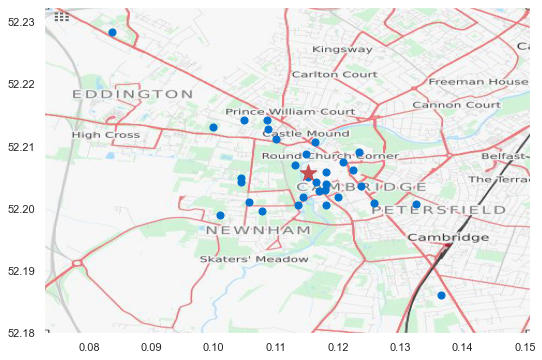

In [16]:
# Plotting Cambridge colleges on map
cam = plt.imread('Cam.JPG')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude, 
           zorder=1, c='#0072ce', s=50)
# Plot the pizza store
ax.scatter(Cambridge.iloc[-1].Longitude,
           Cambridge.iloc[-1].Latitude,  marker="*", c='r', s=300)
# Set x,y limits
ax.set_xlim(0.0728, 0.1509)
ax.set_ylim(52.18, 52.2324)
ax.imshow(cam,extent=(0.0728,0.1509,52.18,52.2324),aspect='equal')
ax.grid(False)

In [17]:
colleges = list(Cambridge.index)
colleges

['The Pizza Store',
 'Wolfson College',
 "Christ's College",
 'Churchill College',
 'Clare College',
 'Clare Hall',
 'Corpus Christi College',
 'Darwin College',
 'Downing College',
 'Emmanuel College',
 'Fitzwilliam College',
 'Girton College',
 'Gonville & Caius College',
 'Homerton College',
 'Hughes Hall',
 'Jesus College',
 "King's College",
 'Lucy Cavendish',
 'Magdalene College',
 'Murray Edwards College',
 'Newnham College',
 'Pembroke College',
 'Peterhouse',
 "Queens' College",
 'Robinson College',
 'Selwyn College',
 'Sidney Sussex College',
 "St Catharine's College",
 "St Edmund's College",
 "St John's College",
 'Trinity College',
 'Trinity Hall']

In [18]:
# Number of Vehicles available for pizza delivery
v = 1   # When vehicle number is 1, it is identical to the TSP

In [19]:
# Initialise the VRP model
VRP = LpProblem("VRP", sense=LpMinimize)

# Define Decision Variables
X = LpVariable.dicts('X', [(i, j)
                           for i in colleges for j in colleges], 
                     cat='Binary')

# Auxiliary variables for subtours elimination
U = LpVariable.dicts('U', [i for i in colleges],
                     lowBound=1, upBound=len(colleges), cat='Integer')

# Define Objective
VRP += lpSum([Cambridge.loc[i, j] * X[(i, j)]
              for i in colleges for j in colleges])


# Define Constraints
for i in colleges:
    cap = v
    # Sum of departure cities
    VRP += lpSum([X[(i, j)] for j in colleges if i != j]) == cap
    # Sum of arrival cities
    VRP += lpSum([X[(j, i)] for j in colleges if i != j]) == cap

# Eliminate Subtours
N = len(colleges)/v
for i in colleges:
    for j in colleges:
        if i != j and (i != 'The Pizza Store' and j != 'The Pizza Store'):
            VRP += U[i] - U[j] <= (N)*(1-X[(i, j)]) - 1


# Solve Model
VRP.solve()
print(LpStatus[VRP.status])

Optimal


In [20]:
edges = [(i, j) for (i, j) in X if value(X[(i, j)])
         != 0 and value(X[(i, j)]) != None]

In [21]:
route = get_route('The Pizza Store')
print(' -> '.join([r for r in route]))

The Pizza Store -> Gonville & Caius College -> Sidney Sussex College -> Jesus College -> Christ's College -> Emmanuel College -> Downing College -> Hughes Hall -> Homerton College -> Peterhouse -> Pembroke College -> Corpus Christi College -> St Catharine's College -> Queens' College -> Darwin College -> Newnham College -> Wolfson College -> Selwyn College -> Clare Hall -> Robinson College -> Churchill College -> Girton College -> Fitzwilliam College -> Murray Edwards College -> St Edmund's College -> Lucy Cavendish -> Magdalene College -> St John's College -> Trinity College -> Trinity Hall -> Clare College -> King's College -> The Pizza Store


In [22]:
# Print the optimized solution
print("The minimized travel distance is {0:.3f} km".\
      format(value(VRP.objective)))

The minimized travel distance is 15.477 km


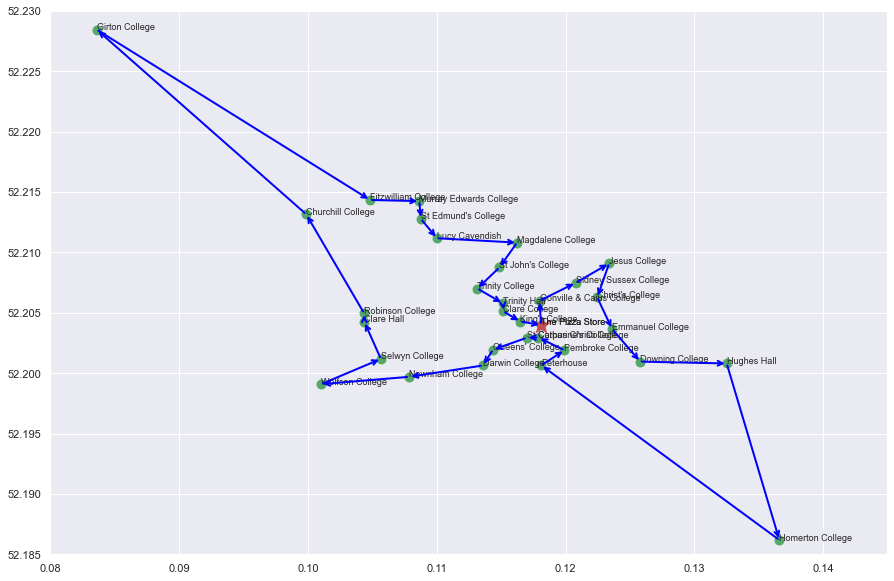

In [23]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude, 
           zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,  
           marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)

# Set annotation
for txt in route:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude),size=9)

# Plot the route
position = Cambridge[['Longitude', 'Latitude']]
for (i, j) in edges:
    p1, p2 = position.loc[i], position.loc[j]
    ax.annotate("", p1, p2, arrowprops=dict(arrowstyle="<-",
                                            color='blue', lw=2))

However, as the number of nodes and vehicles increases, the VRP becomes more complicated. Using the same PuLP model created above would take rather long time to solve and find the optimal solution. 

## Nearest Neighbour

In [24]:
def get_nearest_neighbour(unvisited):
    current = 'The Pizza Store'  # starting point
    NN_path = []
    while True:
        NN_path.append(current)
        unvisited.remove(current)
        if not unvisited:
            break

#idxmin()returns the index of the minimum value of the dataframe
        current = Cambridge.loc[unvisited, current].idxmin()
    NN_path.append('The Pizza Store')
    return NN_path

In [25]:
route = get_nearest_neighbour(list(Cambridge.index))
route

['The Pizza Store',
 "King's College",
 'Clare College',
 'Trinity Hall',
 'Trinity College',
 "St John's College",
 'Magdalene College',
 'Lucy Cavendish',
 "St Edmund's College",
 'Murray Edwards College',
 'Fitzwilliam College',
 'Churchill College',
 'Robinson College',
 'Clare Hall',
 'Selwyn College',
 'Newnham College',
 'Darwin College',
 "Queens' College",
 "St Catharine's College",
 'Corpus Christi College',
 'Pembroke College',
 'Peterhouse',
 'Emmanuel College',
 "Christ's College",
 'Sidney Sussex College',
 'Gonville & Caius College',
 'Jesus College',
 'Downing College',
 'Hughes Hall',
 'Homerton College',
 'Wolfson College',
 'Girton College',
 'The Pizza Store']

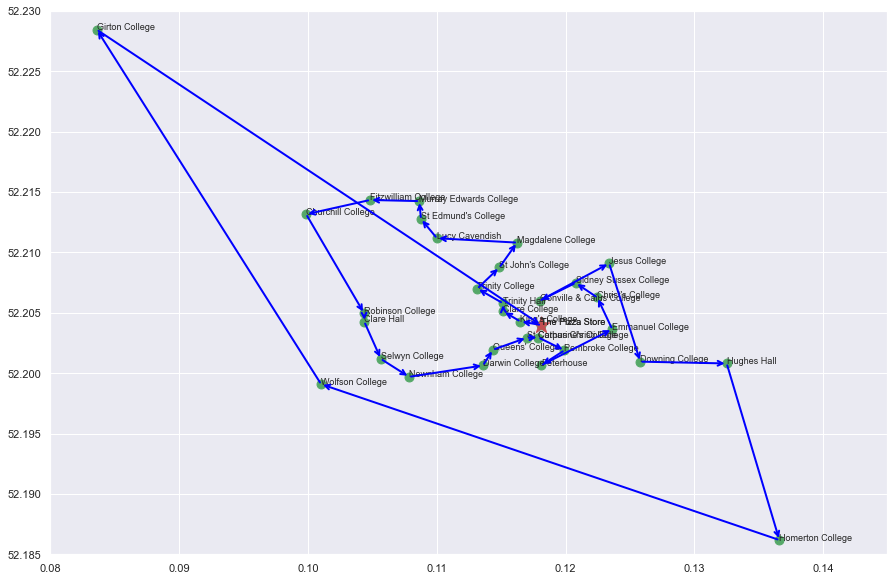

In [26]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude,
           zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,
           marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)

for txt in route:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude, 
                         Cambridge.loc[txt].Latitude), size=9)

#Plot the route
position = Cambridge[['Longitude', 'Latitude']]
for (i, j) in zip(route, route[1:]):
    p1, p2 = position.loc[i], position.loc[j]
    ax.annotate("", p1, p2, arrowprops=dict(arrowstyle="<-", 
                                            color='blue', lw=2))

In [27]:
# Helper function
travel_distance = lambda route: sum(Cambridge.loc[i, j] 
                                    for i, j in zip(route, route[1:]))

print('Total travel distance is {0:.3f} km'.\
      format(travel_distance(route)))

Total travel distance is 19.852 km


## 2-opt Heuristic

In [28]:
def two_opt(route):
    best = route
    found = True
    while found:
        found = False
        # i starts at index location 1, as 0 is where the trip begins
        for i in range(1, len(route)-2):
            for j in range(i+1, len(route)):
                if j-i == 1: continue  
                new_route = route.copy()
                new_route[i:j] = route[j-1:i-1:-1]  # 2-opt swap
                # compare the total travel distance
                if travel_distance(new_route) < travel_distance(best):
                    best = new_route
                    found = True
        route = best
    return best

In [29]:
two_opt_route = two_opt(route)

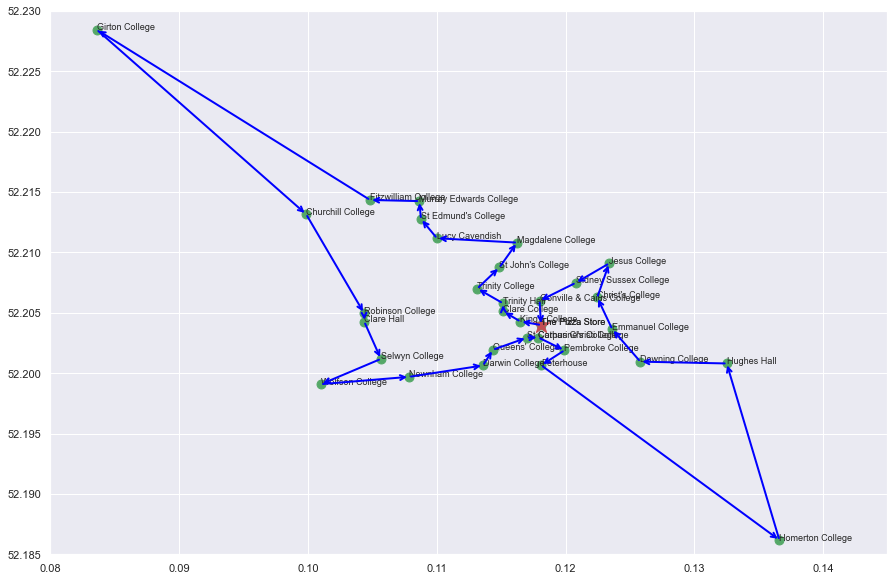

In [30]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude, 
           zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,  
           marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)


for txt in two_opt_route:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude, 
                         Cambridge.loc[txt].Latitude), size=9)


#Plot the route
position = Cambridge[['Longitude', 'Latitude']]
for (i, j) in zip(two_opt_route, two_opt_route[1:]):
    p1, p2 = position.loc[i], position.loc[j]
    ax.annotate("", p1, p2, arrowprops=dict(arrowstyle="<-", color='blue', lw=2))

In [31]:
print('The improved travel distance with 2-opt heuristic is {0:.3f} km'.\
      format(travel_distance(two_opt_route)))

The improved travel distance with 2-opt heuristic is 15.477 km


Now, what if we have 4 delivery vehicles?

In [32]:
# Define a sequential nearest neighbour function
def get_seq_NN(unvisited, v):
    current = {} # starting point for all vehicles
    seq_path = {}
    
    for vehicle_id in range(v):      
        seq_path[vehicle_id]= []
        current[vehicle_id] = ['The Pizza Store']
        seq_path[vehicle_id].append(current[vehicle_id][0])
    
    unvisited.remove('The Pizza Store')    
    
    while True:
        for vehicle_id in range(v):
            current[vehicle_id][0] = Cambridge.\
            loc[unvisited, current[vehicle_id][0]].idxmin()
            seq_path[vehicle_id].append(current[vehicle_id][0])
            unvisited.remove(current[vehicle_id][0])
        # break the for loop if all colleges have been visited
            if not unvisited: 
                break                
    # break the while loop if all colleges have been visited
        if not unvisited:     
            break       
            
    for vehicle_id in range(v):
        seq_path[vehicle_id].append('The Pizza Store')    
    
    return seq_path

In [33]:
route = get_seq_NN(list(Cambridge.index), 4)  # with 4 vehicles

route

{0: ['The Pizza Store',
  "King's College",
  'Clare College',
  'Trinity College',
  'Magdalene College',
  'Sidney Sussex College',
  'Jesus College',
  'Hughes Hall',
  'Homerton College',
  'The Pizza Store'],
 1: ['The Pizza Store',
  'Corpus Christi College',
  'Pembroke College',
  'Peterhouse',
  'Emmanuel College',
  "Christ's College",
  'Downing College',
  'Robinson College',
  'Churchill College',
  'The Pizza Store'],
 2: ['The Pizza Store',
  "St Catharine's College",
  "Queens' College",
  'Darwin College',
  'Newnham College',
  'Selwyn College',
  'Clare Hall',
  'Wolfson College',
  'Girton College',
  'The Pizza Store'],
 3: ['The Pizza Store',
  'Gonville & Caius College',
  'Trinity Hall',
  "St John's College",
  'Lucy Cavendish',
  "St Edmund's College",
  'Murray Edwards College',
  'Fitzwilliam College',
  'The Pizza Store']}

The total travel distance using NN algorithm is 25.255km


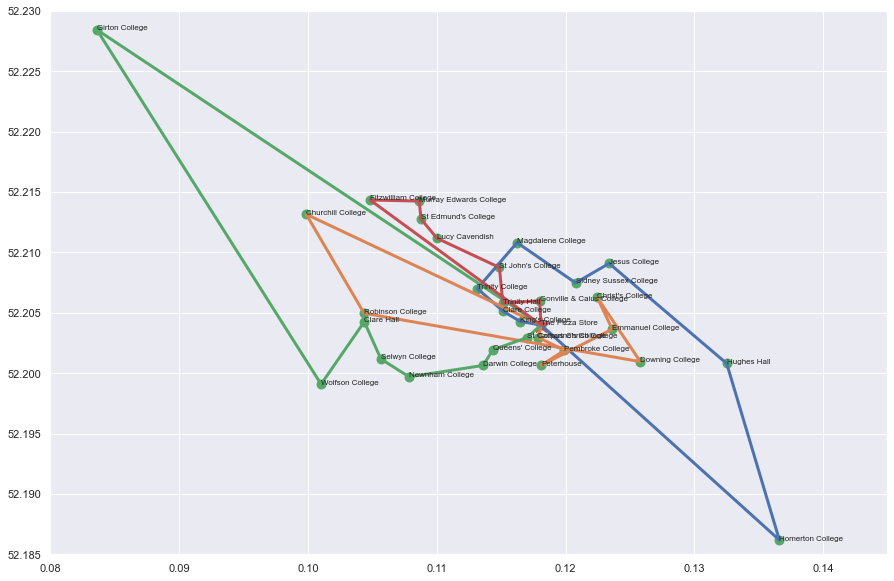

In [34]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude, zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,  marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)

# Set annotation
for txt in Cambridge.index:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude), size=8)

# Initialize total travel distance value
total_travel_distance = 0

# Plot the route
for routes in route.values():
    position = list(zip(*[(Cambridge.loc[i].Longitude, 
                    Cambridge.loc[i].Latitude) for i in routes]))
    plt.plot(position[0], position[1], linewidth=3)
    
    total_travel_distance += travel_distance(routes)
    
print("The total travel distance using NN algorithm is {0:.3f}km".\
      format(total_travel_distance))

**Now, let's improve the routes with 2-opts heuristic.**

Vehicle No.1 Route:
['The Pizza Store', "King's College", 'Clare College', 'Trinity College', 'Magdalene College', 'Sidney Sussex College', 'Jesus College', 'Hughes Hall', 'Homerton College', 'The Pizza Store']

Vehicle No.2 Route:
['The Pizza Store', 'Corpus Christi College', 'Peterhouse', 'Pembroke College', 'Downing College', 'Emmanuel College', "Christ's College", 'Churchill College', 'Robinson College', 'The Pizza Store']

Vehicle No.3 Route:
['The Pizza Store', "St Catharine's College", "Queens' College", 'Darwin College', 'Newnham College', 'Wolfson College', 'Selwyn College', 'Clare Hall', 'Girton College', 'The Pizza Store']

Vehicle No.4 Route:
['The Pizza Store', 'Trinity Hall', 'Fitzwilliam College', 'Murray Edwards College', "St Edmund's College", 'Lucy Cavendish', "St John's College", 'Gonville & Caius College', 'The Pizza Store']

The total travel distance with 2-opt heuristic is 23.909km


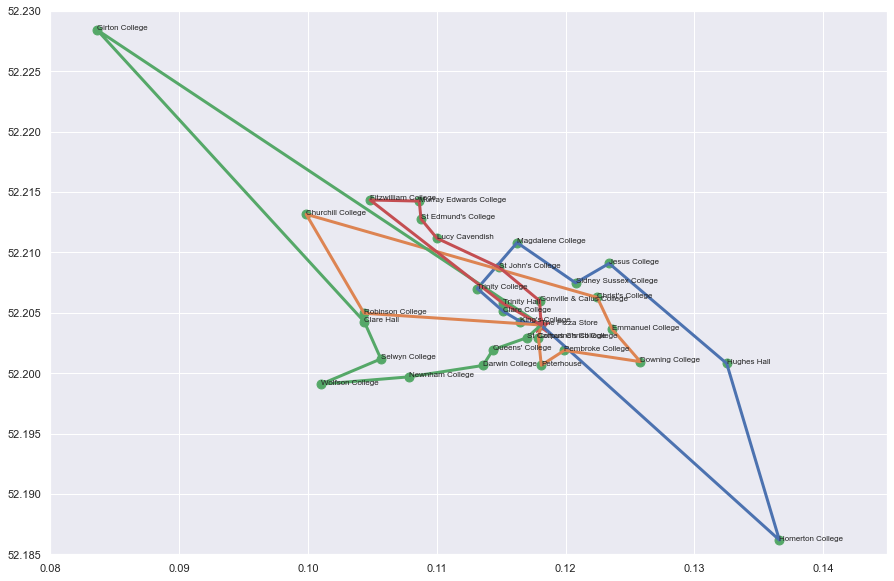

In [35]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Cambridge.Longitude, Cambridge.Latitude, zorder=1, c='g', s=80)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,  marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)


for txt in Cambridge.index:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude), size=8)

# Initialise total travel distance value
total_travel_distance = 0

# Plot improved routes with 2-opt
for vehicle_id, routes in route.items():
    improved_NN_route = two_opt(routes)
    position = list(zip(*[(Cambridge.loc[i].Longitude, 
                           Cambridge.loc[i].Latitude) 
                          for i in improved_NN_route]))
    plt.plot(position[0], position[1], linewidth=3)
     
    print('Vehicle No.{} Route:'.format(vehicle_id+1))
    print('{}\n'.format(improved_NN_route))
    
    total_travel_distance += travel_distance(improved_NN_route)

print("The total travel distance with 2-opt heuristic is {0:.3f}km".\
      format(total_travel_distance))

In [36]:
from sklearn.cluster import SpectralClustering

In [37]:
colleges = pd.read_excel('Colleges.xlsx', index_col="College" )
colleges

,Wolfson College,Christ's College,Churchill College,Clare College,Clare Hall,Corpus Christi College,Darwin College,Downing College,Emmanuel College,Fitzwilliam College,...,Peterhouse,Queens' College,Robinson College,Selwyn College,Sidney Sussex College,St Catharine's College,St Edmund's College,St John's College,Trinity College,Trinity Hall
College,,,,,,,,,,,,,,,,,,,,,
Wolfson College,0.0000,1.6650,1.5660,1.17400,0.6183,1.22800,0.8741,1.7020,1.6220,1.7150,...,1.1780,0.9637,0.6913,0.3925,1.6380,1.16900,1.6100,1.4300,1.2080,1.21700
Christ's College,1.6650,0.0000,1.7200,0.51320,1.2530,0.48250,0.8702,0.6331,0.3025,1.5000,...,0.6910,0.7316,1.2430,1.2770,0.1766,0.52640,1.1800,0.5869,0.6399,0.50250
Churchill College,1.5660,1.7200,0.0000,1.37400,1.0360,1.67300,1.6770,2.2290,1.9340,0.3629,...,1.8660,1.5910,0.9613,1.3890,1.5590,1.62900,0.6089,1.1340,1.1350,1.32400
Clare College,1.1740,0.5132,1.3740,0.00000,0.7420,0.30390,0.5090,0.8597,0.5988,1.2450,...,0.5350,0.3565,0.7373,0.7819,0.4638,0.27220,0.9563,0.4052,0.2516,0.07566
Clare Hall,0.6183,1.2530,1.0360,0.74200,0.0000,0.93320,0.7461,1.5060,1.3140,1.1210,...,1.0190,0.7281,0.0784,0.3532,1.1740,0.87200,0.9926,0.8723,0.6717,0.75270
Corpus Christi College,1.2280,0.4825,1.6730,0.30390,0.9332,0.00000,0.3901,0.5828,0.3977,1.5480,...,0.2558,0.2653,0.9497,0.8570,0.5402,0.06239,1.2560,0.6775,0.5552,0.36810
Darwin College,0.8741,0.8702,1.6770,0.50900,0.7461,0.39010,0.0000,0.8332,0.7609,1.6360,...,0.3084,0.1546,0.7921,0.5439,0.9044,0.34410,1.3880,0.9063,0.7087,0.58260
Downing College,1.7020,0.6331,2.2290,0.85970,1.5060,0.58280,0.8332,0.0000,0.3336,2.0640,...,0.5252,0.7872,1.5280,1.3730,0.8018,0.64020,1.7530,1.1440,1.0940,0.90480
Emmanuel College,1.6220,0.3025,1.9340,0.59880,1.3140,0.39770,0.7609,0.3336,0.0000,1.7480,...,0.5013,0.6584,1.3210,1.2540,0.4683,0.45940,1.4330,0.8242,0.8059,0.62630


In [38]:
location = Cambridge[['Longitude', 'Latitude']].drop(index='The Pizza Store')

In [39]:
# Initialize the model
v = 4 # number of delievery vehicles
clt = SpectralClustering(n_clusters=v, random_state=42, 
                         affinity='nearest_neighbors') 
clt.fit_predict(colleges)

array([2, 3, 1, 0, 2, 0, 2, 3, 3, 1, 1, 0, 3, 3, 3, 0, 1, 1, 1, 2, 3, 3,
       0, 2, 2, 0, 0, 1, 0, 0, 0])

Let's plot the clusters

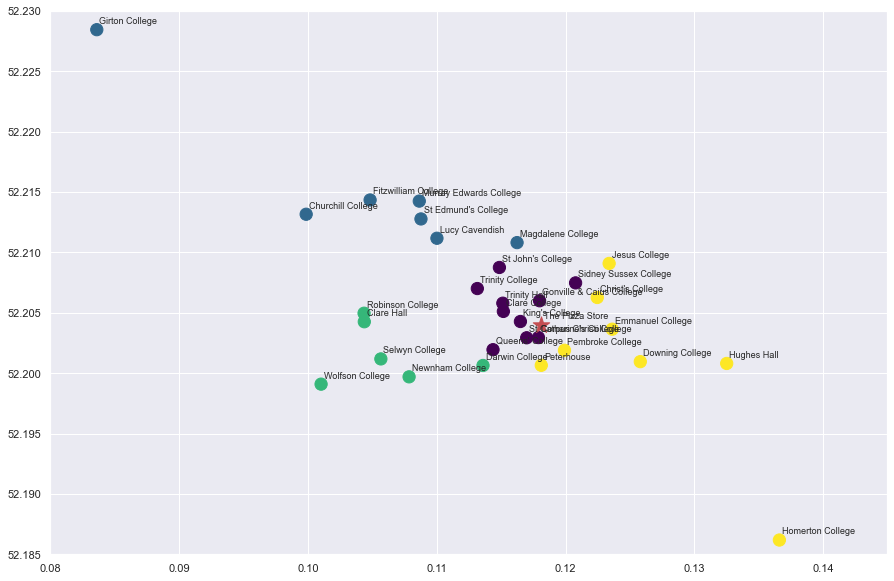

In [40]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(location.Longitude, location.Latitude, 
           c=clt.labels_, cmap='viridis',s=150)

# Annotation
for txt in Cambridge.index:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude+0.0002,
                Cambridge.loc[txt].Latitude+0.0005), size=9)
# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,  marker="*", c='r', s=300);

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230);

Now, let's use NN algorithm to get the route

Vehicle No.1 Route:
['The Pizza Store', "King's College", 'Clare College', 'Trinity Hall', 'Trinity College', "St John's College", 'Gonville & Caius College', 'Sidney Sussex College', 'Corpus Christi College', "St Catharine's College", "Queens' College", 'The Pizza Store']

Vehicle No.2 Route:
['The Pizza Store', 'Magdalene College', 'Lucy Cavendish', "St Edmund's College", 'Murray Edwards College', 'Fitzwilliam College', 'Churchill College', 'Girton College', 'The Pizza Store']

Vehicle No.3 Route:
['The Pizza Store', 'Darwin College', 'Newnham College', 'Selwyn College', 'Clare Hall', 'Robinson College', 'Wolfson College', 'The Pizza Store']

Vehicle No.4 Route:
['The Pizza Store', 'Pembroke College', 'Peterhouse', 'Emmanuel College', "Christ's College", 'Jesus College', 'Downing College', 'Hughes Hall', 'Homerton College', 'The Pizza Store']

The total travel distance using NN algorithm is 20.778km


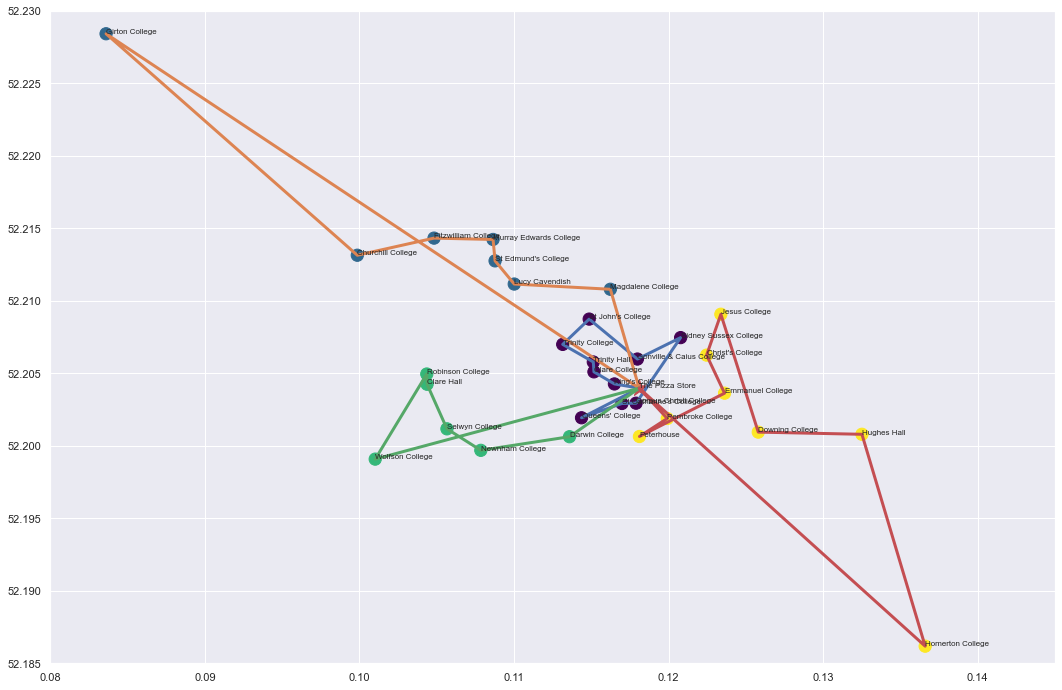

In [41]:
# Plot clustered colleges
fig, ax = plt.subplots(figsize=(18, 12))
ax.scatter(location.Longitude, location.Latitude, 
           c=clt.labels_, cmap='viridis',s=150)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,  marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)

for txt in Cambridge.index:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude), size=8)

# Initialise total travel distance value
total_travel_distance = 0

# Get the routes
for i in range(v):
    unvisited = colleges[clt.labels_== i].index.tolist()
    current = 'The Pizza Store'  # starting point
    unvisited.append(current)    
    route = get_nearest_neighbour(unvisited)
    
    position = list(zip(*[(Cambridge.loc[j].Longitude,
                           Cambridge.loc[j].Latitude) for j in route]))
    plt.plot(position[0], position[1], linewidth=3)
    total_travel_distance += travel_distance(route)
    
    print('Vehicle No.{} Route:'.format(i+1))
    print('{}\n'.format(route))
    
print("The total travel distance using NN algorithm is {0:.3f}km".\
      format(total_travel_distance))

As we can see from the above, the total travel distance (TTD) has significantly improved by using the clustering approach. The TTD has reduced from 25.255km to 20.778km. 

Can we still improve it by applying the 2-opt heuristic?

The improved total travel distance with 2-opt heuristic is 19.146km


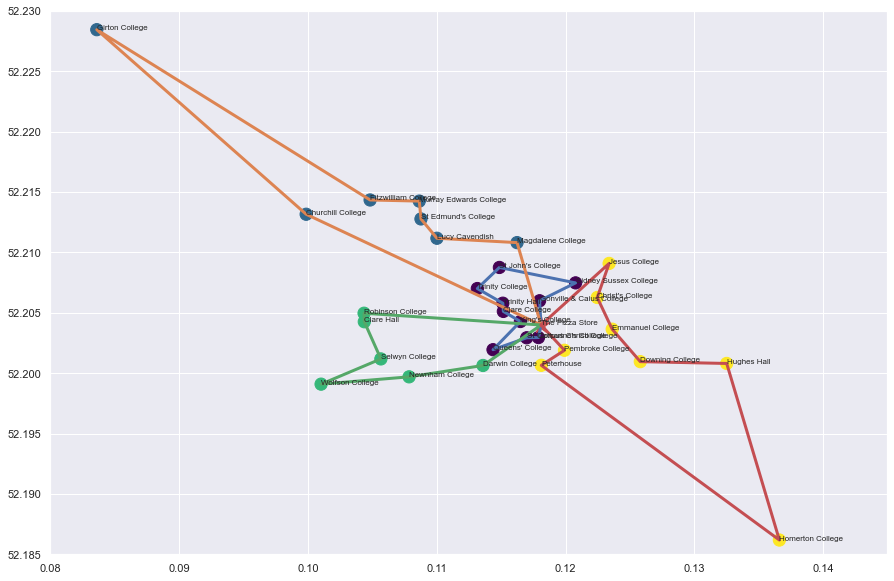

In [42]:
# Plot colleges
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(location.Longitude, location.Latitude, 
           c=clt.labels_, cmap='viridis',s=150)

# Plot the pizza store
ax.scatter(Cambridge.iloc[0].Longitude,
           Cambridge.iloc[0].Latitude,  marker="*", c='r', s=300)

# Set x,y limits
ax.set_xlim(0.080, 0.145)
ax.set_ylim(52.185, 52.230)


for txt in Cambridge.index:
    ax.annotate(txt, xy=(Cambridge.loc[txt].Longitude,
                         Cambridge.loc[txt].Latitude), size=8)

# Initialise total travel distance value
total_travel_distance = 0


# Get the routes
for i in range(v):
    unvisited = colleges[clt.labels_== i].index.tolist()
    current = 'The Pizza Store'  # starting point
    unvisited.append(current)    # we omitted the pizza store in the colleges list, so we need to append it here.
    route = get_nearest_neighbour(unvisited)

# Plot improved routes with 2-opt
    improved_NN_route = two_opt(route)
    position = list(zip(*[(Cambridge.loc[i].Longitude, 
                           Cambridge.loc[i].Latitude) 
                          for i in improved_NN_route]))
    plt.plot(position[0], position[1], linewidth=3)
    total_travel_distance += travel_distance(improved_NN_route)

print("The total travel distance with 2-opt heuristic is {0:.3f}km".format(total_travel_distance))